In [30]:
from __future__ import print_function

from time import time
import logging
import os
import yaml
import cv2
import numpy as np
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [33]:
config = yaml.safe_load(open(r'.\config.yml'))
rootPath = config['path']

X_train = []
X_test = []
y_train = []
y_test = []

# arr = []
# targets = []

setcnt = 0
h, w = 0, 0
test_size = 0.3
max_data_size = 700

dirs = os.listdir(rootPath)
for singleDir in dirs:
    setcnt = setcnt + 1
    parentPath = os.path.join(rootPath, singleDir)
    files = os.listdir(parentPath)
    if len(files) == 0: break
    
    last_train_index = int(len(files) * (1 - test_size))
    if len(files) > max_data_size:
        last_train_index = int(max_data_size * (1 - test_size))
    
    for i in range(len(files)):
        if i > max_data_size: break
            
        farr = np.array(cv2.resize\
                (cv2.cvtColor(cv2.imread(os.path.join(parentPath, files[i])), cv2.COLOR_BGR2GRAY), (300, 300))) / 255
        h = farr.shape[0]
        w = farr.shape[1]
        farr = farr.reshape(1, farr.shape[1] * farr.shape[0])[0]
        fname = singleDir
        
        # arr.append(farr)
        # targets.append(fname)
        
        if i <= last_train_index:
            X_train.append(farr)
            y_train.append(fname)
        else:
            X_test.append(farr)
            y_test.append(fname)

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

# arr = np.array(arr)
# targets = np.array(targets)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# print("arr:", arr.shape)
# print("targets:", targets.shape)

X_train: (980, 90000)
X_test: (422, 90000)
y_train: (980,)
y_test: (422,)


In [44]:
from sklearn.model_selection import train_test_split

# Split data into 75% train and 25% test subsets
#X_train, X_test, y_train, y_test = train_test_split(arr, targets, test_size=0.25, shuffle=False)

In [35]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(random_state=0, max_depth=(setcnt-1), max_features=setcnt)
tree_clf = tree_clf.fit(X_train, y_train)
tree_prediction = tree_clf.predict(X_test)
# tree.plot_tree(clf)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_prediction = rf_clf.predict(X_test)

In [43]:
from sklearn import svm

ovo_clf = svm.SVC(decision_function_shape='ovo')
ovo_clf.fit(X_train_pca, y_train)
ovo_prediction = ovo_clf.predict(X_test_pca)

In [37]:
from sklearn import svm

svm_clf = svm.SVC(gamma=0.001)
svm_clf.fit(X_train, y_train)
svm_prediction = svm_clf.predict(X_test)

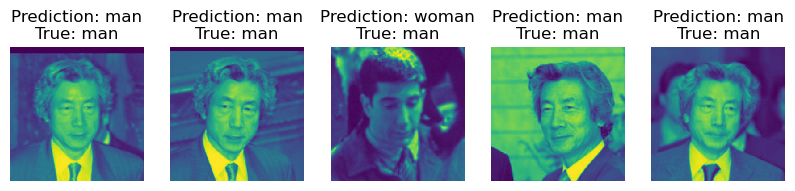

In [38]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for ax, image, ans, prediction in zip(axes, X_test[:5], y_test[:5], svm_prediction):
    ax.set_axis_off()
    image = image.reshape(h, w)
    ax.imshow(image, interpolation="nearest") # cmap=plt.cm.gray_r, 
    ax.set_title(f"Prediction: {prediction}\nTrue: {ans}")

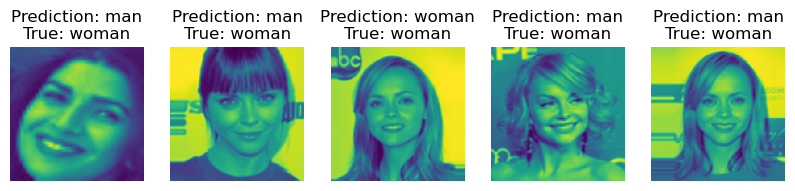

In [39]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for ax, image, ans, prediction in zip(axes, X_test[-5:], y_test[-5:], svm_prediction):
    ax.set_axis_off()
    image = image.reshape(h, w)
    ax.imshow(image, interpolation="nearest") # cmap=plt.cm.gray_r, 
    ax.set_title(f"Prediction: {prediction}\nTrue: {ans}")

In [42]:
from sklearn.decomposition import PCA

n_components = 150
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized').fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=setcnt, metric='euclidean')
kn_clf = kn_clf.fit(X_train_pca, y_train)

kn_prediction = kn_clf.predict(X_test_pca)

In [41]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(X_train, y_train)
lr_prediction = lr_clf.predict(X_test)

C:\Users\sorapark\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 422 points : 152


In [61]:
from sklearn.metrics import accuracy_score

#accuracy scores
tree_acc = accuracy_score(tree_prediction, y_test)
rf_acc = accuracy_score(rf_prediction, y_test)
ovo_acc = accuracy_score(ovo_prediction, y_test)
svm_acc = accuracy_score(svm_prediction, y_test)
kn_acc = accuracy_score(kn_prediction, y_test)
lr_acc = accuracy_score(lr_prediction, y_test)

methods = [ 'DecisionTree', 'RandomForest', 'SVM-OVO', 'SVM', 'KNeighbors', 'LogisticRegression']
acc_arr = np.array([ tree_acc, rf_acc, ovo_acc, svm_acc, kn_acc, lr_acc ])
acc_mth = dict(zip(methods, acc_arr))
acc_max = np.argmax(acc_arr)

for acc in acc_mth:
    print('%s : %.2f' % (acc, acc_mth[acc]))
print('\nThe best classifier for this problem is %s' % methods[acc_max])

DecisionTree : 0.52
RandomForest : 0.83
SVM-OVO : 0.82
SVM : 0.66
KNeighbors : 0.65
LogisticRegression : 0.79

The best classifier for this problem is RandomForest
